# Práctica 3: Quantum Computing (Qiskit)

### Autores:
Rafael Domínguez Sáez

Iñigo Martínez Ciriza

## Preparación del entorno

Antes de nada debemos preparar el entorno de ejecución.

Eliminación de datos innecesarios creados por Google Collab:

In [99]:
!rm -rf sample_data

Descarga de `Qiskit` en caso de no encontrarse en el sistema:

In [100]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

Importación de los paquetes necesarios para el correcto funcionamiento del código:

In [101]:
import qiskit
import math
print("Quiskit version:", qiskit.__version__)

from pylatexenc import *

from qiskit import *
from qiskit_aer import Aer, AerSimulator
from qiskit.providers.fake_provider import GenericBackendV2
from math import *
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
from numpy import pi, random
from numpy.random import randint

from qiskit.circuit.library import UGate, QFT
import pandas as pd
from fractions import Fraction
import matplotlib.pyplot as plt

Quiskit version: 1.2.4


In [102]:
###################### Pal iñigo ######################
"""
Pon en el API_TOKEN.txt tu token cd IBM, NUNCA lo subas a
github, es bastante peligroso, tu te lo guardas para ti,
si lo subes por error a algun lado no te preocupes que IBM
te deja regenerar uno nuevo, pero que intentes no hacerlo.
"""

# Leemos el token que se encuentra en API_TOKEN.txt
with open("API_TOKEN.txt", "r") as file:
    api_token = file.read().strip()

## Compulsory assignment 1: Triple entanglement

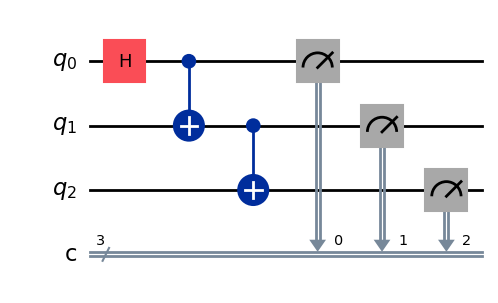

In [103]:
###################### Pal iñigo ######################
"""
No tengo mucha idea de como va esta vaina, lo maximo que te puedo
explicar es que sucede aqui y en su simulación. Este circuito quiere
crear el estado de BELL. La puerta Hadamard (la "H" de la figura)
hace que "q0" se ponga en superposición (tu eres fisico supongo que
sabes de esta vaina), liego bienen las puertas CNOT (las del "+"),
que se encargan de realizar la correlación entre los 3 qbits, por lo
tanto el resultado será ∣000⟩ o ∣111⟩
"""


# Circuit scheme
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
circuit.measure(range(3), range(3))
display(circuit.draw(output="mpl"))

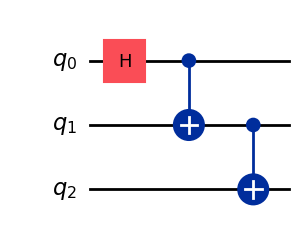

Initial state: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


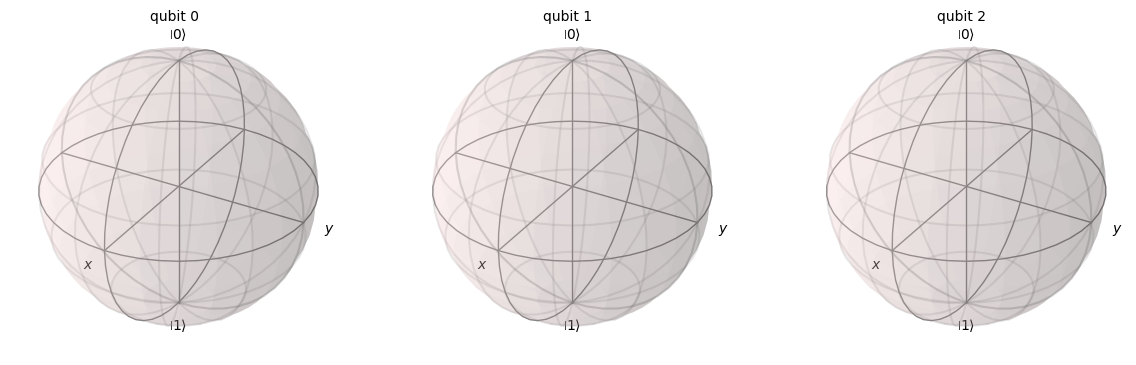

In [104]:
"""
# Circuit initial state: 000
q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")
circuit = QuantumCircuit(q0, q1, q2)
circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)
display(circuit.draw(output="mpl"))

state = Statevector(circuit)
print("Initial state", state)
display(plot_bloch_multivector(state))
"""

circuit = QuantumCircuit(3, name="circuit")

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)

display(circuit.draw(output="mpl"))

state = Statevector.from_instruction(circuit)
print("Initial state:", state)

# Graficar el estado en la esfera de Bloch
display(plot_bloch_multivector(state))

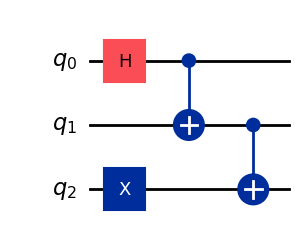

Initial state: Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


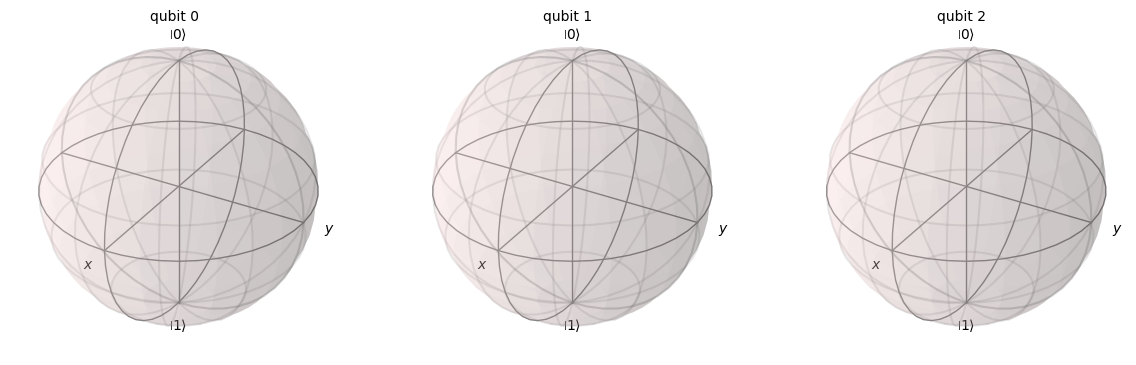

In [105]:
# Circuit initial state: 001

circuit = QuantumCircuit(3, name="circuit")

circuit.x(2)

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)

display(circuit.draw(output="mpl"))

state = Statevector.from_instruction(circuit)
print("Initial state:", state)

# Graficar el estado en la esfera de Bloch
display(plot_bloch_multivector(state))

In [106]:
# Circuit initial state: 010

In [107]:
# Circuit initial state: 011

In [108]:
# Circuit initial state: 100

In [109]:
# Circuit initial state: 101

In [110]:
# Circuit initial state: 110

In [111]:
# Circuit initial state: 111

## Compulsory assignment 2: random generators

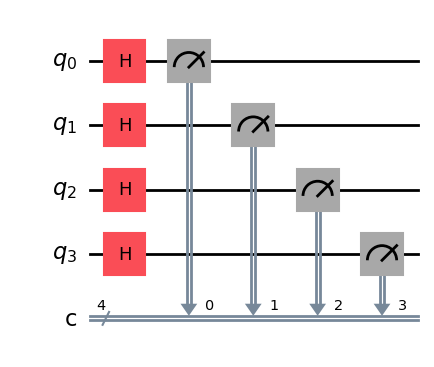

In [112]:
# Circuit scheme 1
circuit = QuantumCircuit(4,4)
for i in range(4):
    circuit.h(i)
circuit.measure(range(4), range(4))
display(circuit.draw(output="mpl"))

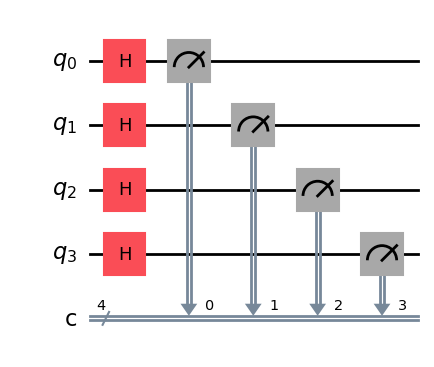

In [113]:
###################### Pal iñigo ######################
"""
Buenas tardes, te comento, hay que buscarse un provider, o sea
hacer una simulación del codigo cuantico o ejecutarlo en simulación
(que es lo que vamos a hacer ahora), ahora elegimos nuestro provider,
he puesto uno basico y uno fake generico. El transpile sirve para
optimizar el circuito ya sea que se ejecuta en fisico o simulacion.
Para ver como funciona el transpile, haz la modificación que dejo
abajo.
"""


from qiskit.providers.basic_provider import BasicProvider

#TODO: Comenta esta primera linea y quita el comentario de la siguiente
backend = BasicProvider().get_backend('basic_simulator')
#backend = GenericBackendV2(num_qubits=5)

transpiled_circuit = transpile(circuit, backend)

transpiled_circuit.draw('mpl')

{'0100': 1}
{'0110': 590, '1011': 653, '1111': 611, '1001': 608, '0100': 616, '1010': 620, '0101': 593, '0111': 632, '0001': 667, '1110': 628, '0011': 611, '1100': 645, '0010': 648, '1101': 674, '0000': 598, '1000': 606}


Text(0.5, 1.0, '10000 Shots')

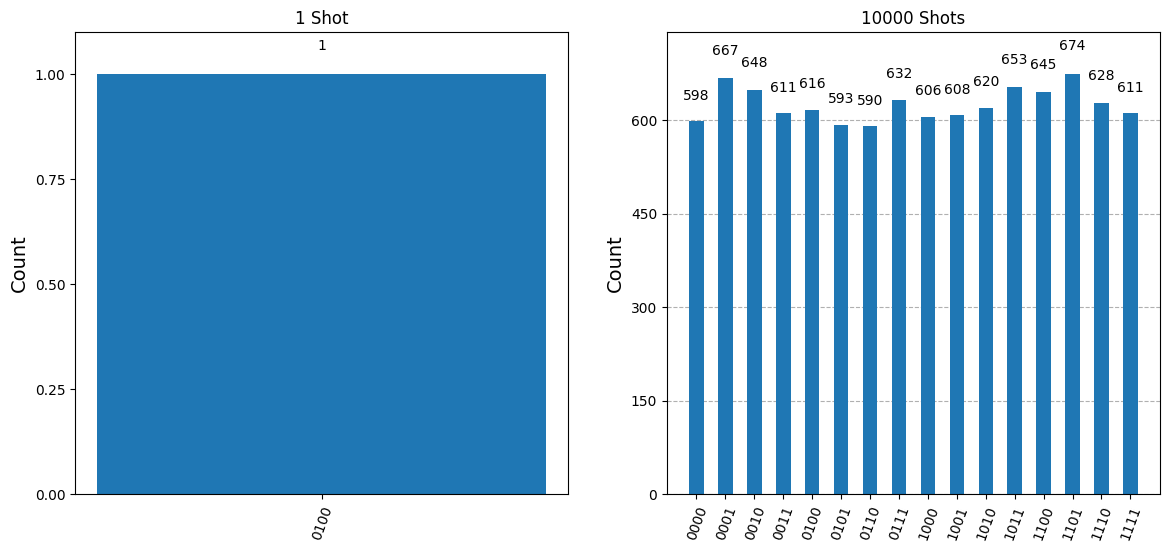

In [114]:
###################### Pal iñigo ######################
"""
Ahora que tenemos el circuito optimizado para nuestro backend,
simplemente quedaría ejecutarlo, para ello, seleccionamos el
número de shots y obtenemos un diccionario con los valores
obtenidos y cuantas veces aparecen. Si ejecutas así para tu ejercicio
puedes ver a lo que me refiero aqui -> ((Si lo pruebas con el
"GenericBackendV2" salen otros estados que no deberían salir
esto, (supongo yo,) se debe a que este backend usa ruido o
imprecisiones en la simulación, (yo creo que) esto se debe
a que puede que el hardware del ordenador cuantico no sea
perfecto y de valores espurios.))
"""

job_one = backend.run(transpiled_circuit, shots=1) #<- Modificamos el número de shots
counts_one = job_one.result().get_counts()
print(counts_one)

job_multiple = backend.run(transpiled_circuit, shots=10000)
counts_multiple = job_multiple.result().get_counts()
print(counts_multiple)


_, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_histogram(counts_one, ax=axes[0])
axes[0].set_title("1 Shot")

plot_histogram(counts_multiple, ax=axes[1])
axes[1].set_title("10000 Shots")



### Interpretación y discusión:
El histograma muestra los resultados de ejecutar el circuito cuántico descrito, donde cada qubit fue puesto en superposición usando una puerta Hadamard y luego medido. En teoría, deberíamos observar una distribución uniforme de todos los posibles estados de 4 bits (de $0000$ a $1111$) debido a la superposición de los qubits. Esto significa que cada uno de los 16 resultados debería aparecer con una frecuencia similar.

Observamos que cada uno de los 16 estados aparece aproximadamente la misma cantidad de veces, lo cual es esperado. Esto indica que cada qubit está en una superposición equilibrada de $\mid0⟩$ y $\mid1⟩$, y los resultados son casi igualmente probables.

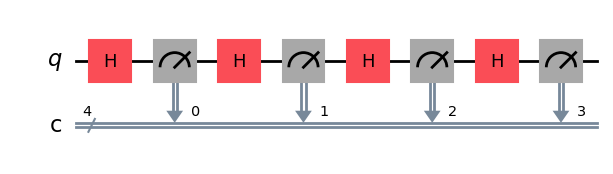

In [115]:
# Circuit scheme 2
circuit = QuantumCircuit(1,4)
circuit.h(0)
circuit.measure(range(1), 0)
circuit.h(0)
circuit.measure(range(1), 1)
circuit.h(0)
circuit.measure(range(1), 2)
circuit.h(0)
circuit.measure(range(1), 3)
display(circuit.draw(output="mpl"))

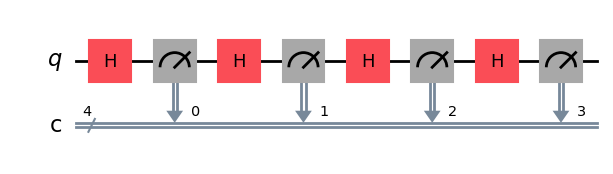

In [116]:
transpiled_circuit = transpile(circuit, backend)

transpiled_circuit.draw('mpl')

{'0110': 1}
{'0100': 620, '1010': 604, '0011': 643, '0000': 644, '1001': 649, '0110': 667, '1000': 594, '0111': 621, '0010': 646, '1011': 635, '0001': 622, '0101': 593, '1110': 640, '1100': 617, '1111': 607, '1101': 598}


Text(0.5, 1.0, '10000 Shots')

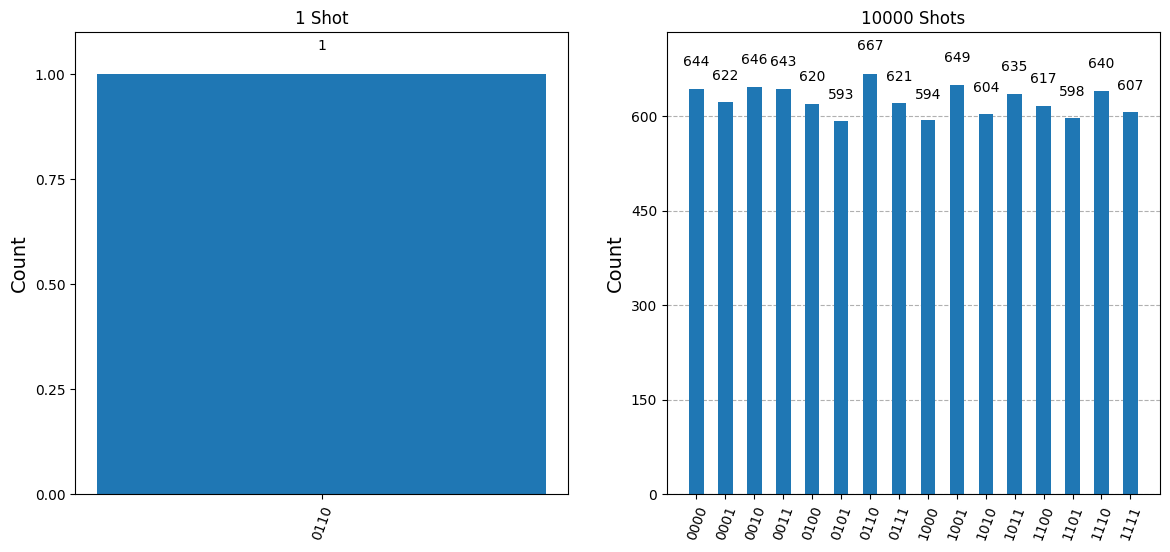

In [117]:
job_one = backend.run(transpiled_circuit, shots=1)
counts_one = job_one.result().get_counts()
print(counts_one)

job_multiple = backend.run(transpiled_circuit, shots=10000)
counts_multiple = job_multiple.result().get_counts()
print(counts_multiple)


_, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_histogram(counts_one, ax=axes[0])
axes[0].set_title("1 Shot")

plot_histogram(counts_multiple, ax=axes[1])
axes[1].set_title("10000 Shots")

## Optional assignment 1: Grover's serach algorithm

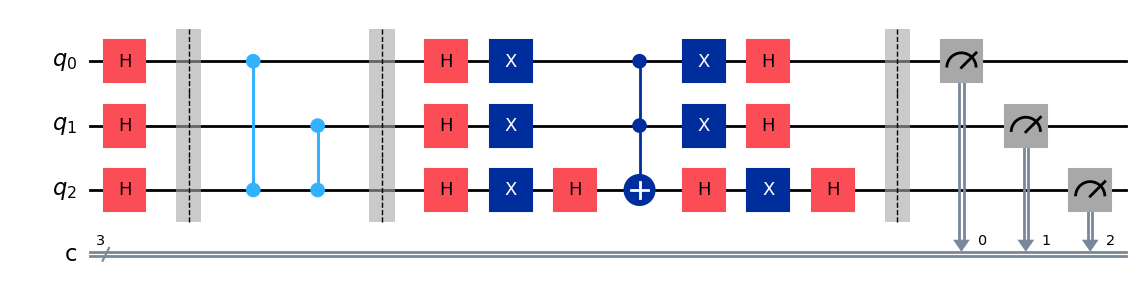

In [118]:
# Circuit scheme
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.barrier()
circuit.cz(0,2)
circuit.cz(1,2)
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.x(0)
circuit.x(1)
circuit.x(2)
circuit.h(2)
circuit.ccx(0,1,2)
circuit.x(0)
circuit.x(1)
circuit.h(2)
circuit.h(0)
circuit.h(1)
circuit.x(2)
circuit.h(2)
circuit.barrier()
circuit.measure(range(3), range(3))
display(circuit.draw(output="mpl"))

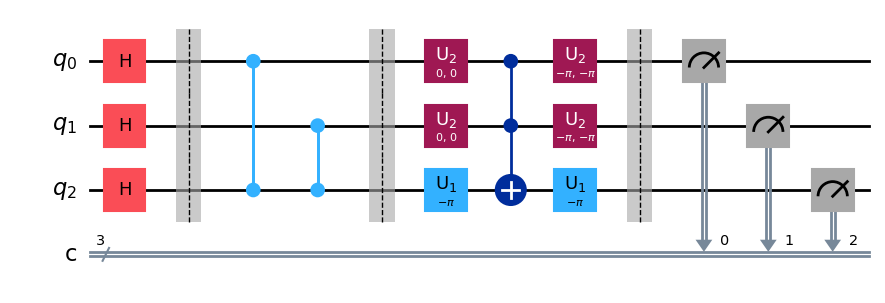

In [119]:
backend = BasicProvider().get_backend('basic_simulator')
#backend = GenericBackendV2(num_qubits=5)

transpiled_circuit = transpile(circuit, backend)
display(transpiled_circuit.draw(output="mpl"))

{'101': 5010, '110': 4990}


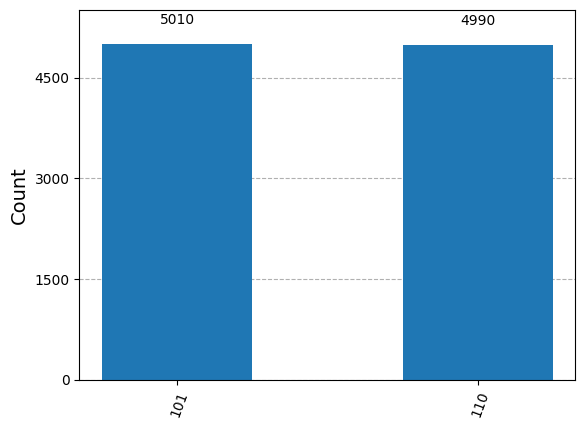

In [120]:
job_multiple = backend.run(transpiled_circuit, shots=10000)
counts_multiple = job_multiple.result().get_counts()
print(counts_multiple)
plot_histogram(counts_multiple)

## Optional assignment 2: QFT algorithm

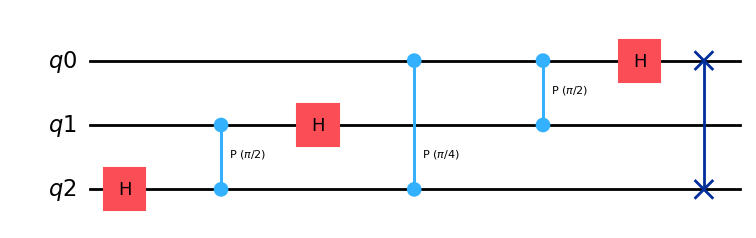

In [121]:
# Circuit scheme
q0 = QuantumRegister(1, "q0")
q1 = QuantumRegister(1, "q1")
q2 = QuantumRegister(1, "q2")
circuit = QuantumCircuit(q0, q1, q2)
circuit.h(2)
circuit.cp(math.pi/2, 1, 2)
circuit.h(1)
circuit.cp(math.pi/4, 0, 2)
circuit.cp(math.pi/2, 0, 1)
circuit.h(0)
circuit.swap(0,2)
display(circuit.draw(output="mpl"))

Initial state Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


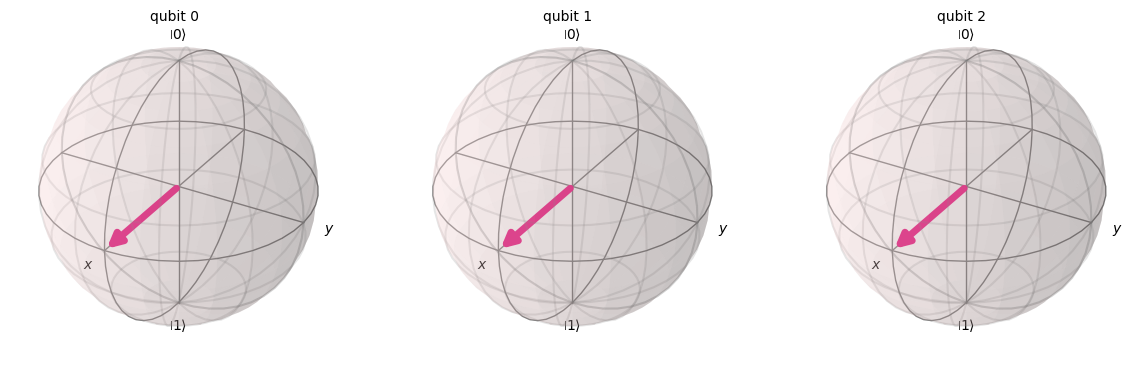

In [122]:
state = Statevector(circuit)
print("Initial state", state)
display(plot_bloch_multivector(state))